# Linear regression


#### 1. Load the provided .npy files. You can load it with numpy.
 - each file contains one vector, X and y
 - visualize X vs y on a scatter plot
 - fit an $y = w_0 + w_1\cdot X + w_2 \cdot X^2$ linear regression using sklearn

#### 2. Using different features
 - plot the residuals (the difference between the prediction and the actual $y$) vs the original $y$
 - a non-random-noise like pattern suggests non-linear connection between the features and the predictions
 - someone told us that the connection between X and y is $y = A \cdot X + B \cdot \cos^3(X) + C\cdot X^2 + D$
    - using sklearn's linear regression estimate $A, B, C, D$!
 - plot the residuals again! is it better now?

#### 3. Other methdods than sklearn for linear regression
 - using the statsmodels package perform the same linear regression as in 2.) (hint: use statsmodels.api.OLS)
 - is the result the same? if not guess, why? (did you not forget to add the constant term?)
 - try to get the same results with statsmodels as with sklearn!
 - using the analytic solution formula shown during the lecture, calculate the coefficients (A, B, C, D). are they the same compared to the two previous methods?

#### 4. 
 - load the real_estate.csv to a pandas dataframe
 - drop the ID column and the geographic location columns
 - fit a linear regression model to predict the unit price using sklearn

#### 5. 
 - interpret the coefficients and their meaning shortly with your own words
 - plot the residuals for the predictions. if you had to decide only on this information, which house would you buy?


### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 

#### 1. Load the provided .npy files. You can load it with numpy.
 - each file contains one vector, X and y
 - visualize X vs y on a scatter plot
 - fit an $y = w_0 + w_1\cdot X + w_2 \cdot X^2$ linear regression using sklearn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn import linear_model

In [2]:
df_realestate = pd.read_csv('Data/real_estate.csv')
data_X = np.load('Data/X.npy')
data_y = np.load('Data/y.npy')


df_X_01 = pd.DataFrame({'x':data_X,'x^2':[x*x for x in data_X]})
df_y = pd.DataFrame({'y':data_y})

In [3]:
print(len(data_X))
print(len(data_y))


1000
1000


Text(0.5, 1.0, 'Prediction 2. order polynomial')

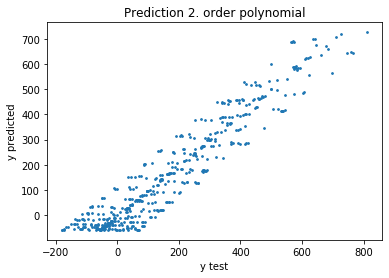

In [4]:
X_train_1 = df_X_01.iloc[::2]
y_train_1 = df_y.iloc[::2]

X_test_1 = df_X_01.iloc[1::2]
y_test_1 = df_y.iloc[1::2]

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train_1,y_train_1)



#prediction:
y_pred_1 = regr.predict(X_test_1)



plt.scatter(y_test_1,y_pred_1,s=3)

plt.xlabel('y test')
plt.ylabel('y predicted')
plt.title('Prediction 2. order polynomial')

Text(0.5, 1.0, 'test')

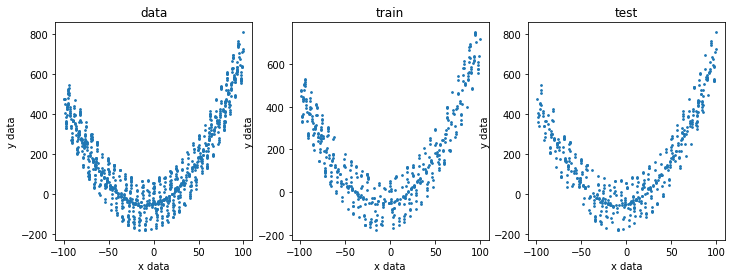

In [5]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(data_X,data_y,s=3)
plt.xlabel('x data')
plt.ylabel('y data')
plt.title('data')

plt.subplot(1,3,2)
plt.scatter(list(X_train_1['x']),y_train_1,s=3)
plt.xlabel('x data')
plt.ylabel('y data')
plt.title('train')

plt.subplot(1,3,3)
plt.scatter(list(X_test_1['x']),y_test_1,s=3)
plt.xlabel('x data')
plt.ylabel('y data')
plt.title('test')



#### 2. Using different features
 - plot the residuals (the difference between the prediction and the actual $y$) vs the original $y$
 - a non-random-noise like pattern suggests non-linear connection between the features and the predictions
 - someone told us that the connection between X and y is $y = A \cdot X + B \cdot \cos^3(X) + C\cdot X^2 + D$
    - using sklearn's linear regression estimate $A, B, C, D$!
 - plot the residuals again! is it better now?


Text(0.5, 1.0, 'Prediction 2. order polynomial')

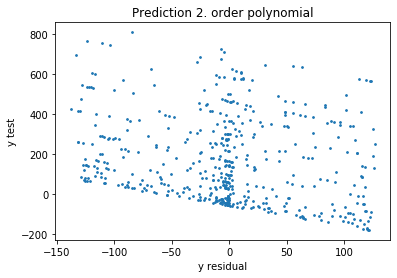

In [6]:
residual_y = [y_pred_1[i]-list(y_test_1['y'])[i] for i in range(len(y_pred_1))]

plt.scatter(residual_y,y_test_1,s=3)

plt.xlabel('y residual')
plt.ylabel('y test')
plt.title('Prediction 2. order polynomial')

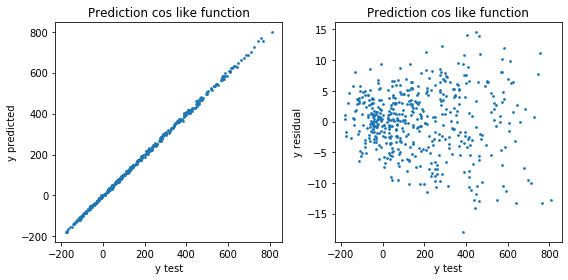

In [7]:
df_X_02 = pd.DataFrame({'x':data_X,
                        'cos^3':[np.cos(x)**3 for x in data_X],
                        'x^2':[x*x for x in data_X]})



X_train_2 = df_X_02.iloc[::2]
y_train_2 = df_y.iloc[::2]

X_test_2 = df_X_02.iloc[1::2]
y_test_2 = df_y.iloc[1::2]

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train_2,y_train_2)



#prediction:
y_pred_2 = regr.predict(X_test_2)

residual_y = [y_pred_2[i]-list(y_test_2['y'])[i] for i in range(len(y_pred_2))]



plt.figure(figsize=(8,4))
plt.subplot(1,2,1)

plt.scatter(y_test_2,y_pred_2,s=3)

plt.xlabel('y test')
plt.ylabel('y predicted')
plt.title('Prediction cos like function')


plt.subplot(1,2,2)
plt.scatter(y_test_2,residual_y,s=3)

plt.xlabel('y test')
plt.ylabel('y residual')
plt.title('Prediction cos like function')
plt.tight_layout()

#### 3. Other methdods than sklearn for linear regression
 - using the statsmodels package perform the same linear regression as in 2.) (hint: use statsmodels.api.OLS)
 - is the result the same? if not guess, why? (did you not forget to add the constant term?)
 - try to get the same results with statsmodels as with sklearn!
 - using the analytic solution formula shown during the lecture, calculate the coefficients (A, B, C, D). are they the same compared to the two previous methods?

In [8]:
import statsmodels.api as sm

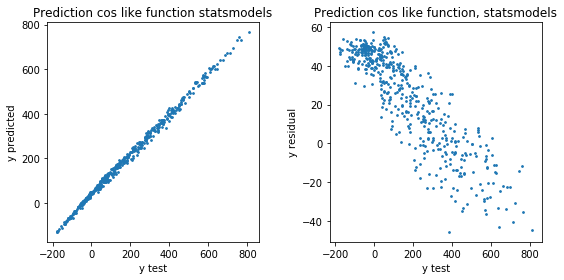

In [9]:
model = sm.OLS(y_train_2,X_train_2)
results = model.fit()
y_pred_3 = results.predict(X_test_2)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(y_test_2,y_pred_3,s=3)

plt.xlabel('y test')
plt.ylabel('y predicted')
plt.title('Prediction cos like function statsmodels')



plt.subplot(1,2,2)
residual_y_3 = [list(y_pred_3)[i]-list(y_test_2['y'])[i] for i in range(len(y_pred_3))]

plt.scatter(y_test_2,residual_y_3,s=3)

plt.xlabel('y test')
plt.ylabel('y residual')
plt.title('Prediction cos like function, statsmodels')
plt.tight_layout()

/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


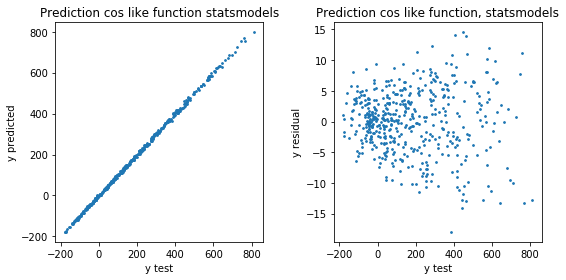

In [10]:
X_train_2 = sm.add_constant(X_train_2)
X_test_2 = sm.add_constant(X_test_2)

model = sm.OLS(y_train_2,X_train_2)
results = model.fit()
y_pred_3 = results.predict(X_test_2)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(y_test_2,y_pred_3,s=3)

plt.xlabel('y test')
plt.ylabel('y predicted')
plt.title('Prediction cos like function statsmodels')



plt.subplot(1,2,2)
residual_y_3 = [list(y_pred_3)[i]-list(y_test_2['y'])[i] for i in range(len(y_pred_3))]

plt.scatter(y_test_2,residual_y_3,s=3)

plt.xlabel('y test')
plt.ylabel('y residual')
plt.title('Prediction cos like function, statsmodels')
plt.tight_layout()

In [11]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.701e+05
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:14:25   Log-Likelihood:                -1547.4
No. Observations:                 500   AIC:                             3103.
Df Residuals:                     496   BIC:                             3120.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -49.9757      0.370   -135.100      0.0

In [12]:
print('sklearn coefficients:',regr.coef_)

sklearn coefficients: [[1.19740640e+00 1.23483282e+02 6.56809924e-02]]


In [13]:

print('Analitycal solution:')
d = X_test_2.values
print(np.linalg.inv(d.T@d)@(d.T@y_pred_3))



Analitycal solution:
[-4.99757283e+01  1.19740640e+00  1.23483282e+02  6.56809924e-02]


# Conlusions:
* sklearn gives us a very good prediction, with cos like cunction. The statsmodels one is not that good, maybe because we forget to add a constanst. 
* with the constant it becomes good again
* I don't remember any analitical method to examine the coefficients, it could be done with solving the equations for the parameters as variable, with the y values, and the x features. But sklearn and statsmodels sotered them, and they are the same.


#### 4. 
 - load the real_estate.csv to a pandas dataframe
 - drop the ID column and the geographic location columns
 - fit a linear regression model to predict the unit price using sklearn


In [14]:
df_realestate = pd.read_csv('Data/real_estate.csv')

df_realestate = df_realestate.drop(['No'],axis=1)
df_realestate = df_realestate.drop(['X5 latitude'],axis=1)
df_realestate = df_realestate.drop(['X6 longitude'],axis=1)
df_realestate.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


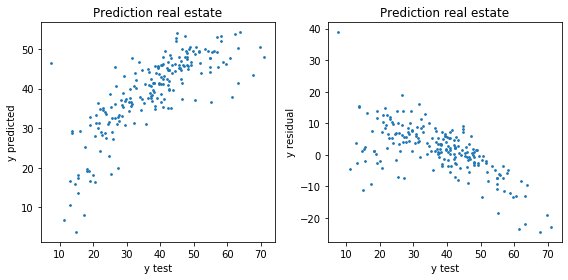

In [15]:
#train:
real_e_X_train = df_realestate[['X1 transaction date',
                                'X2 house age',
                                'X3 distance to the nearest MRT station',
                                'X4 number of convenience stores']].iloc[::2]
real_e_X_train = sm.add_constant(real_e_X_train)

real_e_y_train = df_realestate['Y house price of unit area'].iloc[::2]


#test
real_e_X_test = df_realestate[['X1 transaction date',
                               'X2 house age',
                               'X3 distance to the nearest MRT station',
                               'X4 number of convenience stores']].iloc[1::2]
real_e_X_test = sm.add_constant(real_e_X_test)

real_e_y_test = df_realestate['Y house price of unit area'].iloc[1::2]


# with sklearn
regr_real_e = linear_model.LinearRegression()
regr_real_e.fit(real_e_X_train,real_e_y_train)



#prediction:
real_e_y_pred = regr_real_e.predict(real_e_X_test)

residual_y_real_e = [real_e_y_pred[i]-list(real_e_y_test)[i] for i in range(len(real_e_y_pred))]



plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(real_e_y_test,real_e_y_pred,s=3)

plt.xlabel('y test')
plt.ylabel('y predicted')
plt.title('Prediction real estate')



plt.subplot(1,2,2)

plt.scatter(real_e_y_test,residual_y_real_e,s=3)

plt.xlabel('y test')
plt.ylabel('y residual')
plt.title('Prediction real estate')
plt.tight_layout()

#### 5. 
 - interpret the coefficients and their meaning shortly with your own words
 - plot the residuals for the predictions. if you had to decide only on this information, which house would you buy?


In [16]:
print(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores'])
print(regr_real_e.coef_)

['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']
[ 0.          5.10733    -0.2429475  -0.00572881  1.07397654]


In [17]:
df_realestate.columns[:-1]

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores'],
      dtype='object')

# conclusions:

* The equation of the house pricing is the next: $Price = A \cdot transaction \mbox{ }date + B \cdot age + C \cdot distance + D \cdot nr \mbox{ } of \mbox{ } stores $
* If a coefficient is positive, those features increase the price, if negative so those decrease the price. The smaller the coef the less impact it hase on the price.

* The coefficient of the transcaction date is the greatest, but it could be becaue of inflation.

* I plotted the residual for all regression types. next to the predicted and true value of the y features.

* I would buy the house on the top left corner of the previous figure, because our model says it's more valuable than its actual price.